In [ ]:
# =====================================
# IMPORT LIBRARIES
# =====================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
print("=" * 60)
print("PART A: LINEAR REGRESSION")
print("=" * 60)

print("\n1. Creating synthetic regression dataset...")
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

PART A: LINEAR REGRESSION

1. Creating synthetic regression dataset...
Training set size: 240 samples
Testing set size: 60 samples


In [ ]:
print("\n2. Training Linear Regression model...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)


2. Training Linear Regression model...


In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n3. Model Performance Metrics:")
print("-" * 40)
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Testing MAE: {mae_test:.4f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")


3. Model Performance Metrics:
----------------------------------------
Training MSE: 228.8446
Testing MSE: 240.0475
Training MAE: 12.1294
Testing MAE: 12.0117
Training R² Score: 0.7564
Testing R² Score: 0.7986


In [ ]:
print("\n4. Model Coefficients:")
print("-" * 40)
print(f"Intercept (β₀): {linear_model.intercept_:.4f}")
print(f"Coefficient (β₁): {linear_model.coef_[0]:.4f}")

print("\n5. Interpretation:")
print("-" * 40)
print("• Intercept (β₀): Expected value of y when X = 0")
print(f"• Coefficient (β₁): For each unit increase in X, y increases by {linear_model.coef_[0]:.4f}")


4. Model Coefficients:
----------------------------------------
Intercept (β₀): 0.3065
Coefficient (β₁): 27.6115

5. Interpretation:
----------------------------------------
• Intercept (β₀): Expected value of y when X = 0
• Coefficient (β₁): For each unit increase in X, y increases by 27.6115


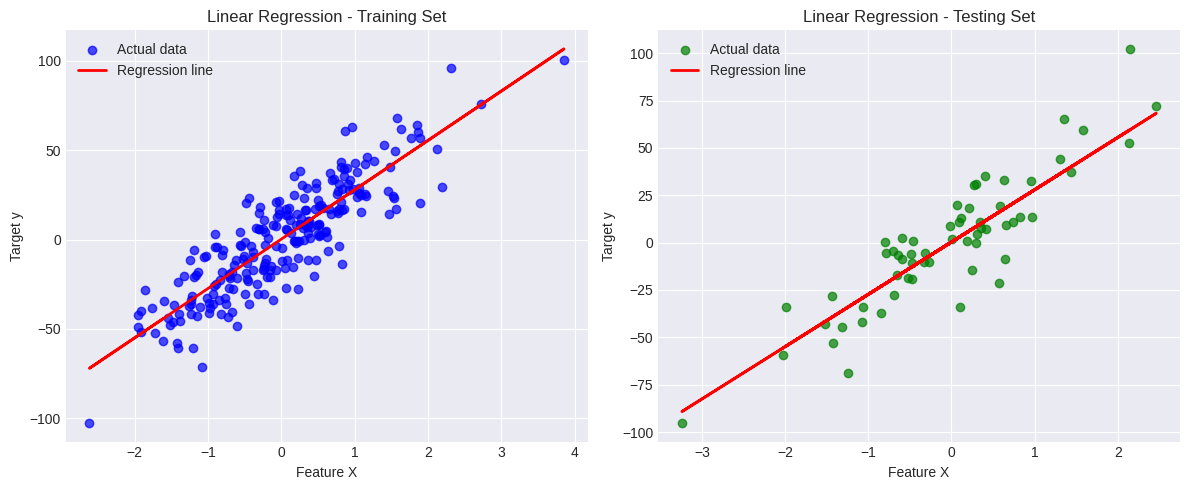

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_train, y_train, alpha=0.7, label='Actual data', color='blue')
axes[0].plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
axes[0].set_title('Linear Regression - Training Set')
axes[0].set_xlabel('Feature X')
axes[0].set_ylabel('Target y')
axes[0].legend()

axes[1].scatter(X_test, y_test, alpha=0.7, label='Actual data', color='green')
axes[1].plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression line')
axes[1].set_title('Linear Regression - Testing Set')
axes[1].set_xlabel('Feature X')
axes[1].set_ylabel('Target y')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "=" * 60)
print("PART B: LOGISTIC REGRESSION")
print("=" * 60)

print("\n1. Loading Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Classes: {data.target_names}")


PART B: LOGISTIC REGRESSION

1. Loading Cancer dataset...
Dataset shape: (569, 30)
Number of features: 30
Classes: ['malignant' 'benign']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("\n2. Training Logistic Regression model...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)


2. Training Logistic Regression model...


In [ ]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\n3. Model Performance Metrics:")
print("-" * 40)
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


3. Model Performance Metrics:
----------------------------------------
Training Accuracy: 0.9874
Testing Accuracy: 0.9883
Precision: 0.9907
Recall: 0.9907
F1-Score: 0.9907



4. Confusion Matrix:


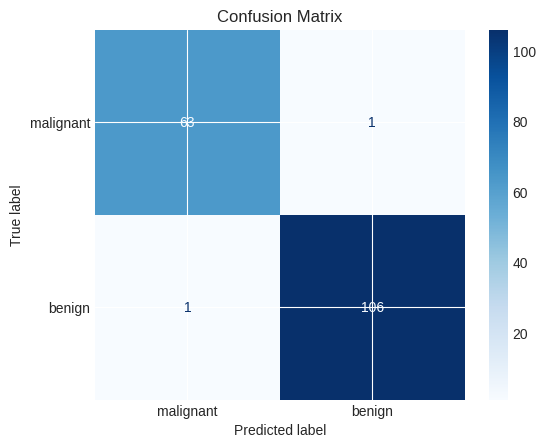


PROGRAM COMPLETED SUCCESSFULLY


In [ ]:
print("\n4. Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("\nPROGRAM COMPLETED SUCCESSFULLY")